# Exploratory Data Analysis (EDA)

In [8]:
# Basic Imports

import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [9]:
df_subset = pd.read_csv("./data/yelp_reviews_subset.csv")
df_subset.head()

,review_id,stars,text,date,label
0,igUar2sMmvX7Ps1AbvQXgg,1,This is the worst Walmart ever conceived by hu...,2020-07-07 22:59:20,0
1,peB3hSTWXgpsc2SCaBEPtA,5,I've always loved Outback and the fact that th...,2020-06-05 20:58:29,1
2,wrLFWRBu_JkD6CW5XpLj5w,5,LOVE THIS PLACE!! Such amazing ice cream at a ...,2020-05-13 02:10:17,1
3,_Mgbav5Q7LD1FZfIvueQXw,5,Took both my pups for a way ovetdue grooming. ...,2020-05-11 01:18:16,1
4,j0dc6B6xEXTp_zYMuJ3ysQ,1,"i went to get a chicken sandwich, and being al...",2020-05-04 01:57:38,0


## Distribution of Star Ratings

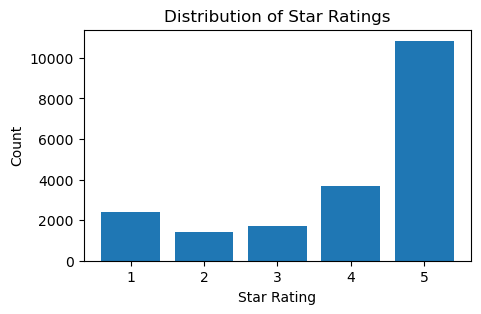

In [15]:
star_counts = df_subset["stars"].value_counts().sort_index()

plt.figure(figsize=(5, 3))
plt.bar(star_counts.index, star_counts.values)
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")

plt.savefig("outputs/distribution_of_star_ratings.png", bbox_inches="tight", dpi=300)

plt.show()

The distribution of star ratings is heavily skewed toward higher ratings, with 5-star reviews being the most frequent. This reflects a general positivity bias in Yelp reviews and indicates the presence of class imbalance in the dataset.

## Relationship between Review Length and Star Rating

<Figure size 600x400 with 0 Axes>

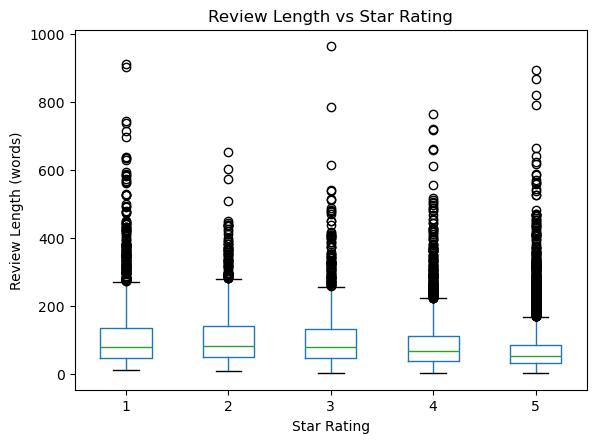

In [20]:
df_subset["review_length"] = df_subset["text"].str.split().str.len()

plt.figure(figsize=(6, 4))
df_subset.boxplot(column="review_length", by="stars", grid=False)
plt.xlabel("Star Rating")
plt.ylabel("Review Length (words)")
plt.title("Review Length vs Star Rating")
plt.suptitle("")

plt.savefig("outputs/review_length_vs_star_rating.png", bbox_inches="tight", dpi=300)

plt.show()

The relationship between review length and star rating shows that lower review ratings leads to longer review length on average. This suggests that dissatisfied users are more likely to provide detailed explanations of their experiences, whereas higher-rated reviews are often shorter and more concise.

## Relationship between Review Length and Binary Label (Negative/Positive)

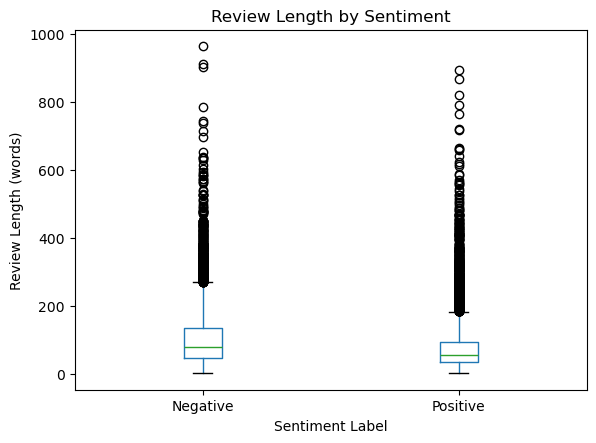

In [21]:
df_subset.boxplot(column="review_length", by="label", grid=False)
plt.xticks([1, 2], ["Negative", "Positive"])
plt.xlabel("Sentiment Label")
plt.ylabel("Review Length (words)")
plt.title("Review Length by Sentiment")
plt.suptitle("")

plt.savefig("outputs/review_length_by_sentiment.png", bbox_inches="tight", dpi=300)

plt.show()

This visualization better shows that negative reviews tend to be longer on average and exhibit greater variability, suggesting that dissatisfied users are more likely to write detailed explanations of their experiences. Positive reviews are generally shorter and more concise, often focusing on brief expressions of satisfaction. This pattern helps explain why textual features are informative for sentiment classification.

## Distribution of Review Lengths

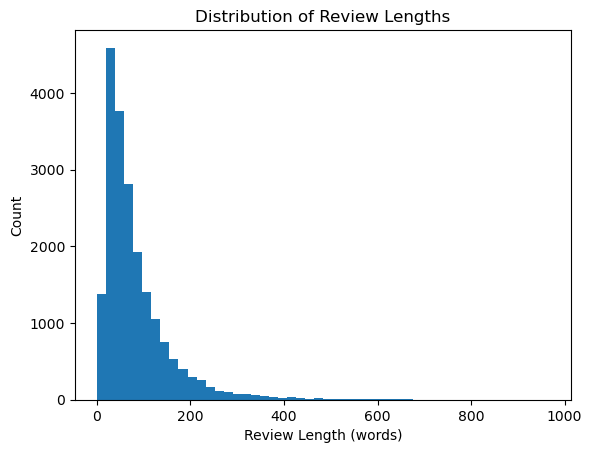

In [22]:
plt.hist(df_subset["review_length"], bins=50)
plt.xlabel("Review Length (words)")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")

plt.savefig("outputs/distribution_of_review_lengths", bbox_inches="tight", dpi=300)

plt.show()

The histogram shows that review lengths are highly right-skewed. Most reviews are relatively short, while a small number of reviews are very long, creating a long tail. This indicates that although detailed reviews exist, the majority of users express their opinions concisely. Such skewness motivates the use of TF-IDF representations, which can handle sparse and uneven text lengths effectively.